<a href="https://colab.research.google.com/github/44REAM/CEB-machine-learning/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive bayes

modified from Aj Ratchainant slide

## Theory

### Conditional probability

<p align="center">
<img src="https://github.com/44REAM/CEB-machine-learning/blob/main/images/set.png?raw=1" width="300" />
</p>

$$
P(X|Y) = \frac{P(X \cap Y)}{P(Y)} \to \frac{P(X, Y)}{P(Y)}
$$

$$
P(Y|X) = \frac{P(X \cap Y)}{P(X)} \to \frac{P(X, Y)}{P(X)}
$$


Term:
- joint probability
- marginal probability
- conditional probability

---

### Bayes Theorem
Let $A$, $B$ a random variable 

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

for

$P(A|B)$ = Posterior, $P(B|A)$ = Likelihood, $P(A)$ = Prior, $P(B)$ = Marginal

---

**Example**

*Historical data tells that 10% of
patients visiting our clinic have liver
disease. 7% of patients diagnosed
with liver disease, they are
alcoholics. 5% of patients according
to the test are alcoholics. Finding
out the probability of liver disease if
a given patient is alcoholics.*

**Prior**: Historical data tells that 10% of patients visiting our clinic
have liver disease, $P(\text{liver disease}) = 0.1$

**Likelihood**: 7% of patients diagnosed with liver disease, they
are alcoholics, $P(\text{alcoholics} | \text{liver disease}) = 0.07$

**Marginal**: 5% of patients according to the test are alcoholics,
$P(\text{alcoholics})$ = 0.05

**Posterior**: $P(\text{liver disease | alcoholics)}) = (0.07 × 0.1)/0.05 = 0.1$

---


### Conditional independent

Let $A$, $B$ a random variable 

**Definition**: Event $A$ and $B$ are independent if and only if 
$$P(A,B) = P(A)P(B)$$

And if 
$$P(A|B) = P(A)$$

---

if $P(C) > 0$

**Definition**: Two events $A$ and $B$ are conditionally independent given event $C$ with $P(C) > 0$ if and only if

$$P(A,B|C) = P(A|C)P(B|C)$$

if $P(B)>0$ we also get

$$P(A|B,C) = P(A|C)$$

**Translation**: Knowing information on event $B$ dose not improve our knowledge on $A$ given information $C$

---

**Example**:  

1. Lung Cancer prediction from smoking and sex

Knowing prior probability of sex does not improve
posterior probability of lung cancer given smoking

2. Rain prediction from a lot of cloud and low light

Knowing prior probability of low light dose not improve posterior probability of raining since we had been given an information of lot of cloud



### Naive bayes model

<p align="center">
<img src="https://github.com/44REAM/CEB-machine-learning/blob/main/images/network.png?raw=1" width="300" />
</p>

---

- Let $Y = \{y_1, y_2, ..., y_k\}$ be a set of class labels
- Let $X_j$ be the $j$ random variable for $j \in \{1,2,... m\}$ and $x_j$ is the value of $X_j$

For each class label $i \in \{1,2,...k\}$ Naive bayes model is defined as the follows

$$P(y_i | x_1, x_2, ...,x_m) = \frac{P(y_i) P(x_1, x_2, ...,x_m|y_i)}{P(x_1, x_2, ...,x_m)}$$

The naive bayes model assume $X_j$ and $X_g$ are independent given Y for $j,g \in \{1,2,... m\}$, we got.

$$P(y_i | x_1, x_2, ...,x_m) = \frac{P(y_i)}{P(x_1, x_2, ..., x_m)}\prod^m_{j=1} P(x_j|y_i)$$

$$\overbrace{P(y_i | x_1, x_2, ...,x_m)}^{\text{Posterior}} \underbrace{\propto P(y_i)}_{\text{Prior}}\overbrace{\prod^m_{j=1} P(x_j|y_i)}^\text{Likelihood}$$

---

**MLE Inference**

$$\hat{y}_i = \text{argmax}_{y_i \in Y} \prod^m_{j=1} P(x_j|y_i)$$
$$\hat{y}_i = \text{argmax}_{y_i \in Y} \sum^m_{j=1} \text{log} P(x_j|y_i)$$

**MAP Inference**

$$\hat{y}_i = \text{argmax}_{y_i \in Y} P(y_i) \prod^m_{j=1} P(x_j|y_i)$$
$$\hat{y}_i = \text{argmax}_{y_i \in Y} \text{log}P(y_i) + \sum^m_{j=1} \text{log} P(x_j|y_i)$$

---


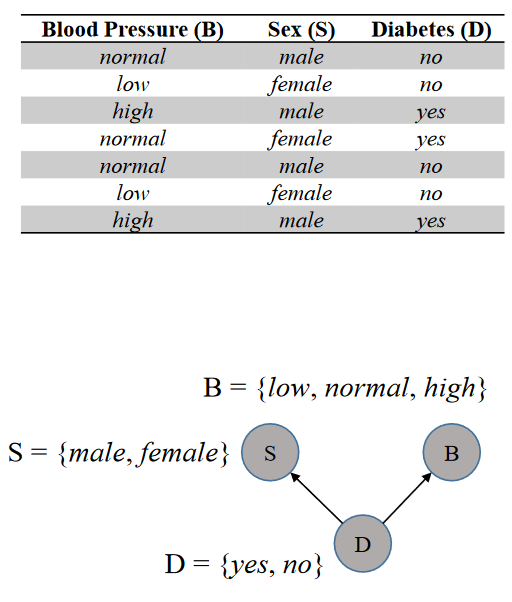

### Example

Model parameters are

- $P(S|D)$
- $P(B|D)$
- $P(D)$

**Step 1: Create frequency tables**

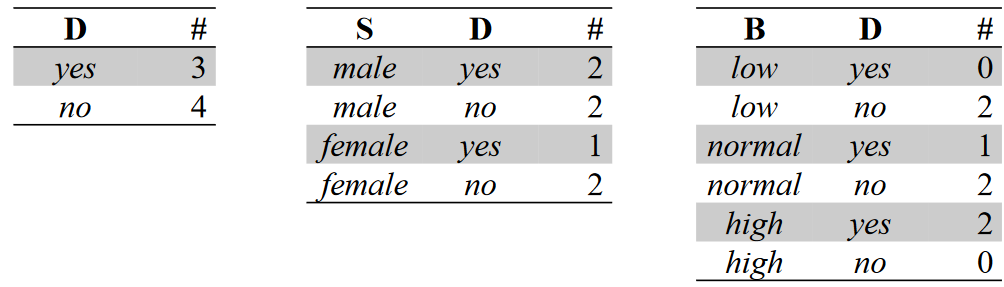

**Step 2: Initiaize the joint tables**

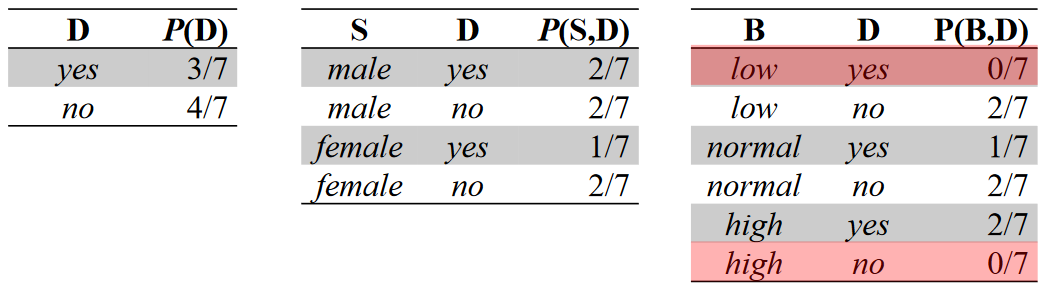

**Step 2.1: Apply laplace smoothing**

$$$$

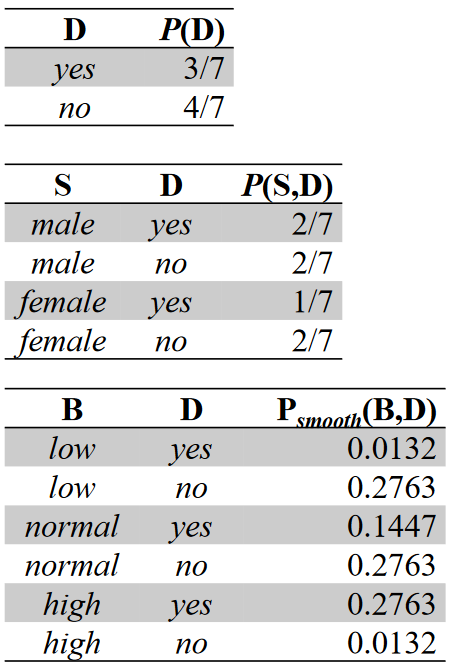

**Step 3: Calculate conditional probability**

calculate $P(S|D)$ and $P(B|D)$


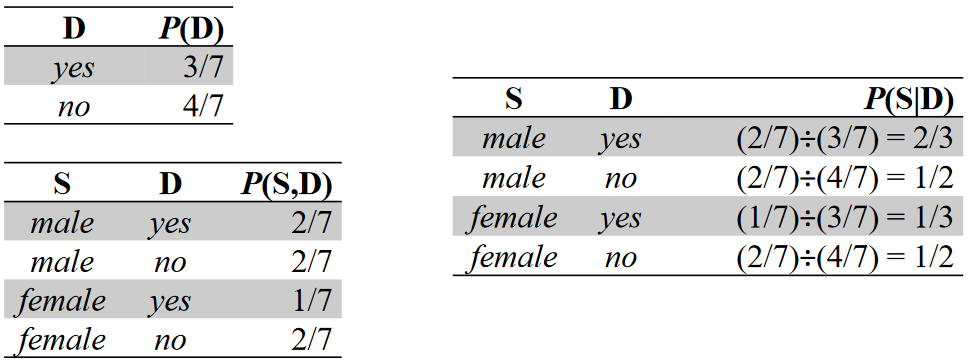

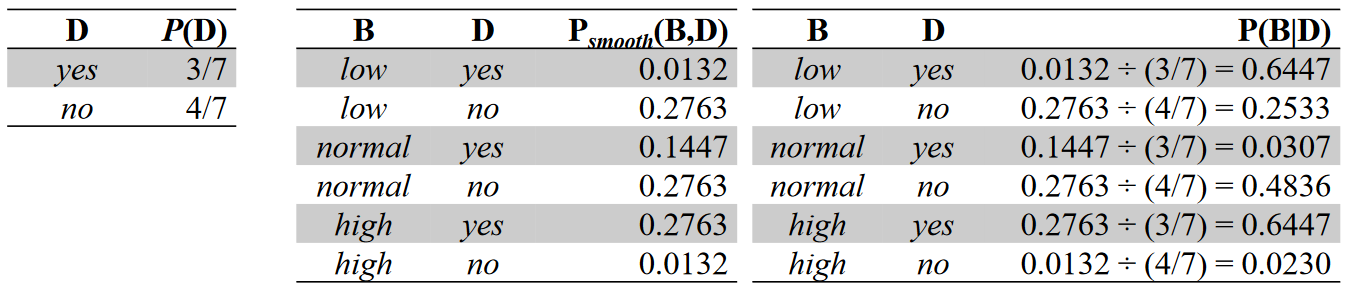

**Example**

Given a patient is male and has high blood pressure, what is the conclusion for his diabetes.

**MLE inference**

$$Log P(male|yes) + log P(high|yes) = -0.8445$$

$$Log P(male|no) + log P(high |no) = log 0.5+log0.0230 = -4.4654$$

## Coding

In [9]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Categorical naive bayes

In [106]:
data = [
    ['normal', 'male', 'no'],
    ['low', 'female', 'no'],
    ['high', 'male', 'yes'],
    ['normal', 'female', 'yes'],
    ['normal', 'male', 'no'],
    ['low', 'female', 'no'],
    ['high', 'male', 'yes']
    ]

df = pd.DataFrame(data,columns = ['B', 'S', 'D'])

le = LabelEncoder()
decoder = {}

y = df['D']
y = [1 if diag == 'yes' else 0 for diag in y]

x = df.drop(columns = ['D'])

for col in x.columns:
    x[col] = le.fit_transform(x[col])
    decoder[col] = list(le.classes_)

In [112]:
nb = CategoricalNB(alpha= 0.1)
nb.fit(x, y)

CategoricalNB(alpha=0.1)

In [90]:
nb.predict_proba([[2,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


array([[0.59813084, 0.40186916]])

In [117]:
def posterior_without_evident(x, nb, prior = True):
    y_pred = np.zeros(len(nb.classes_))
    for i, feature in enumerate(nb.feature_log_prob_):
        for y_class, likelihood in enumerate(feature):
            y_pred[y_class] += likelihood[x[i]]
    if prior:
        for y_class, prior in enumerate(nb.class_log_prior_):
            y_pred[y_class] += prior
    return np.exp(y_pred)

In [118]:
nb.predict_proba([[2,1]])[0]/posterior_without_evident([2,1], nb)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


array([4.28660436, 4.28660436])

### Gaussian naive bayes

In [28]:
# modified from https://www.kaggle.com/code/nisasoylu/naive-bayes-implementation-on-cancer-dataset/notebook
!wget https://raw.githubusercontent.com/44REAM/CEB-machine-learning/main/data.csv


--2022-10-05 07:38:28--  https://raw.githubusercontent.com/44REAM/CEB-machine-learning/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 122.27K  --.-KB/s    in 0.02s   

2022-10-05 07:38:28 (5.59 MB/s) - ‘data.csv’ saved [125204/125204]



In [29]:
cancer_df = pd.read_csv('data.csv')
cancer_df = cancer_df.drop(columns = ['id', 'Unnamed: 32'])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
y = cancer_df['diagnosis']
y = [1 if diag == 'M' else 0 for diag in y]

x = cancer_df.drop(columns = ['diagnosis'])# /cancer_df.drop(columns = ['diagnosis']).max(axis = 0)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [32]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [33]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9438596491228071


## Practice

### Get MLE from Gaussian naive bayes section

### Mix distribution